In [152]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

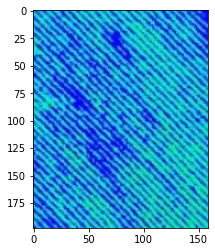

In [148]:
# image will be loaded in BGR
img = cv2.imread("D:/Aksara/Weed Detection/Dataset/Capture.JPG")
# img = cv2.imread("D:/Aksara/Weed Detection/Dataset/Capture.JPG")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [ ]:
# Apply Hough lines algorithm
lines = cv2.HoughLines(skel,1,np.pi/180,130)
a,b,c = lines.shape
for i in range(a):
    rho = lines[i][0][0]
    theta = lines[i][0][1]    
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),3, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
kernelSizes = [(3, 3), (9, 9), (15, 15)]



# blurred = cv2.GaussianBlur(img, (5, 5), 0)
# edges = cv2.Canny(blurred, 50, 200)
# plt.imshow(edges)

for (kX, kY) in kernelSizes:


    blurred = cv2.GaussianBlur(img, (kX, kY), 0)
    edges = cv2.Canny(blurred, 50, 200)
    plt.imshow(edges)
    cv2.imshow("Average ({}, {})".format(kX, kY), edges)
    cv2.waitKey(0)

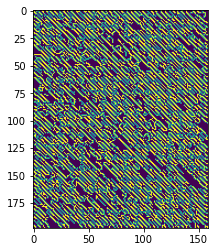

In [26]:
blurred = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blurred, 10, 200)
plt.imshow(edges)

In [27]:
size = np.size(edges)

skel = np.zeros(edges.shape, np.uint8)

# setting threshold's min & max
ret, edges = cv2.threshold(gscale,128,255,0)


element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

done = False
while (not done):
    # erosion removes the foreground object's boundary
    eroded = cv2.erode(edges,element)
    
    # dilation is opposite of errosion
    temp = cv2.dilate(eroded, element)
    
    # subtract just removes the first images's pixels w.r.t to scecond
    temp = cv2.subtract(edges, temp)
    
    # bitwise turns the pixel off if its value it 0, and turn it on if its >0
    skel = cv2.bitwise_or(skel, temp)
    
    edges = eroded.copy()
    
    zeros = size - cv2.countNonZero(edges)
    if zeros==size:
        done = True

In [28]:
size

31482

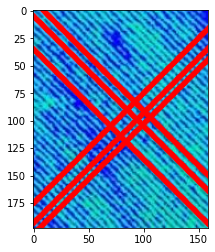

In [29]:
# Hough lines algorithm, it'll track the rows
lines = cv2.HoughLines(skel,1,np.pi/180,130)
a,b,c = lines.shape
for i in range(a):
    rho = lines[i][0][0]
    theta = lines[i][0][1]    
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),3, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

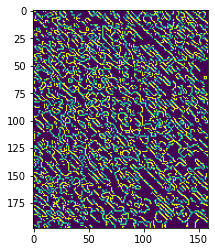

In [6]:
# separating blue, green, red channels
b,g,r = cv2.split(img)

# now minusing the red and green, as we only need green color
# you can vary multiplying integer 3 with 2, I got better results(sharp edges) when I used 3. But don't vary this too much 

gscale = 2*g-r-b

# Canny is used for edge detection, you can vary min and max arguments, and its hard to find
gscale = cv2.Canny(gscale,200,290, apertureSize = 3)

# image will be shown in gray scale
plt.imshow(gscale)

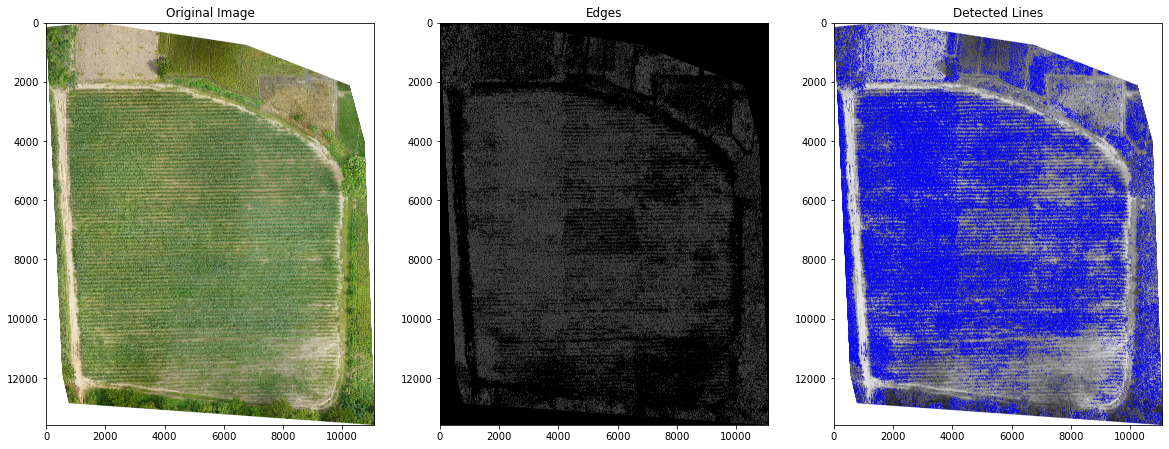

In [102]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_crop_rows(image_path):
    # Load image
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to open image file {image_path}")
        return

    # Convert grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (7, 7), 1.5)

    # Apply Canny edge detector
    edges = cv2.Canny(blurred, 50, 150)

    # Perform Hough Line Transform to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=0, maxLineGap=10)

    output_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    # Draw detected lines
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Display Images
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title("Edges")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Detected Lines")
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    
    cv2.imwrite('D:/Aksara/Weed Detection/Dataset/result.png', output_image)

    plt.show()


image_path = 'D:/Aksara/Weed Detection/Dataset/01032024_TSP2_GWN_1A-1.jpg'  # Replace with your image file path
detect_crop_rows(image_path)


In [101]:
cv2.imwrite('D:/Aksara/Weed Detection/Dataset/result.png', output_image)

NameError: name 'output_image' is not defined

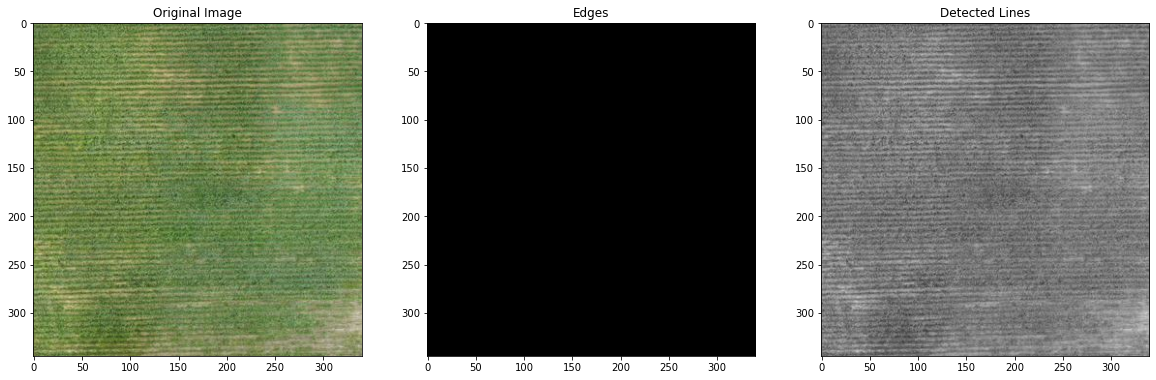

In [87]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_crop_rows(image_path):
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to open image file {image_path}")
        return

    # Conver grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (7, 7), 1.5)

    # Apply Canny edge detector
    edges = cv2.Canny(blurred, 75, 200)

    # Perform Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=20)

    output_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    # Draw detected lines
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display images
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title("Edges")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Detected Lines")
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

    plt.show()

image_path = 'D:/Aksara/Weed Detection/Dataset/ss2.jpg'  # Replace with your image file path
detect_crop_rows(image_path)


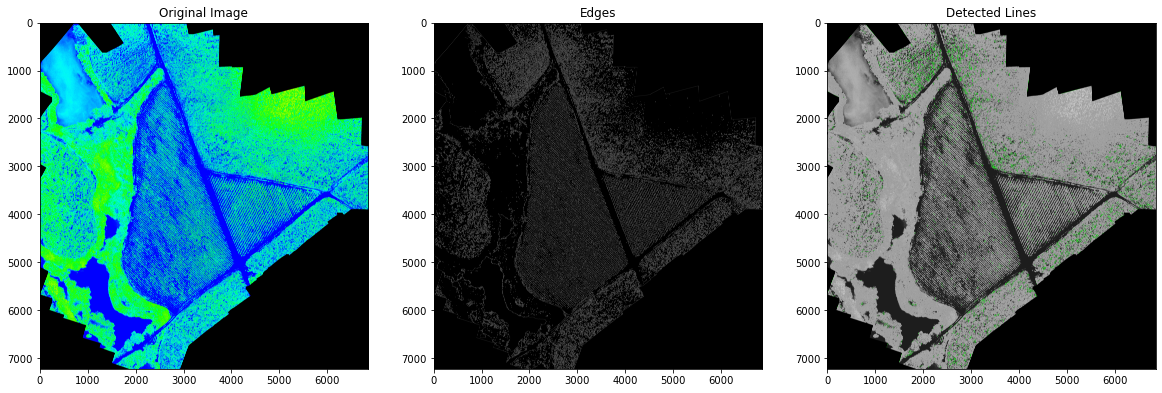

In [91]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_crop_rows(image_path):
    
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to open image file {image_path}")
        return

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (7, 7), 1.5)

    edges = cv2.Canny(blurred, 50, 150)

    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=30, maxLineGap=5)

    output_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title("Edges")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Detected Lines")
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

    plt.show()

image_path = 'D:/Aksara/Weed Detection/Dataset/preprocessed image.tif'  # Replace with your image file path
detect_crop_rows(image_path)


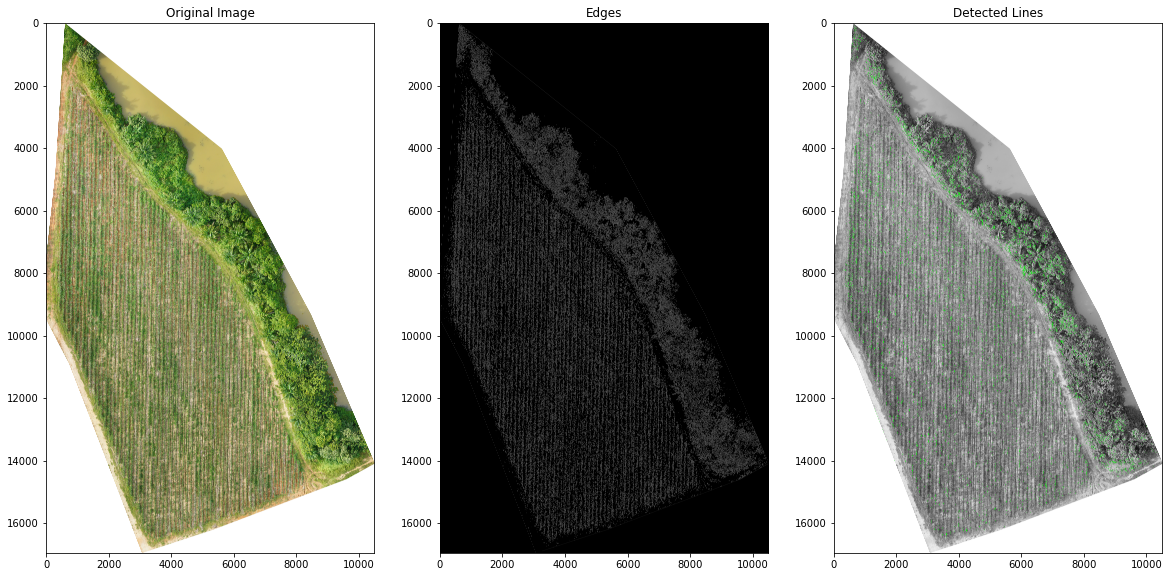

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_crop_rows(image_path):
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to open image file {image_path}")
        return

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (7, 7), 1.5)

    edges = cv2.Canny(blurred, 50, 150)
    
    cv2.imwrite('D:/Aksara/Weed Detection/Dataset/output/edges_field2.png', edges)


    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=30, maxLineGap=5)

    output_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title("Edges")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Detected Lines")
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

    plt.show()

image_path = 'D:/Aksara/Weed Detection/Dataset/field2/19022024_KND_GBL_1A-1.jpg'  # Replace with your image file path
detect_crop_rows(image_path)


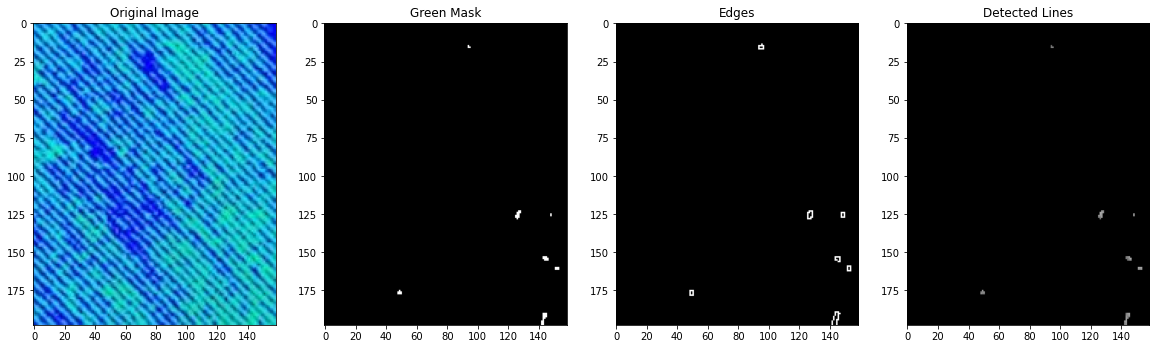

In [62]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_green_crop_rows(image_path):
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to open image file {image_path}")
        return

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])

    mask = cv2.inRange(hsv, lower_green, upper_green)

    green_isolated = cv2.bitwise_and(image, image, mask=mask)

    gray = cv2.cvtColor(green_isolated, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (7, 7), 1)

    edges = cv2.Canny(blurred, 50, 150)

    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=30, maxLineGap=5)

    output_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 4, 2)
    plt.title("Green Mask")
    plt.imshow(mask, cmap='gray')

    plt.subplot(1, 4, 3)
    plt.title("Edges")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 4, 4)
    plt.title("Detected Lines")
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

    plt.show()

image_path = 'D:/Aksara/Weed Detection/Dataset/Capture.jpg'  # Replace with your image file path
detect_green_crop_rows(image_path)


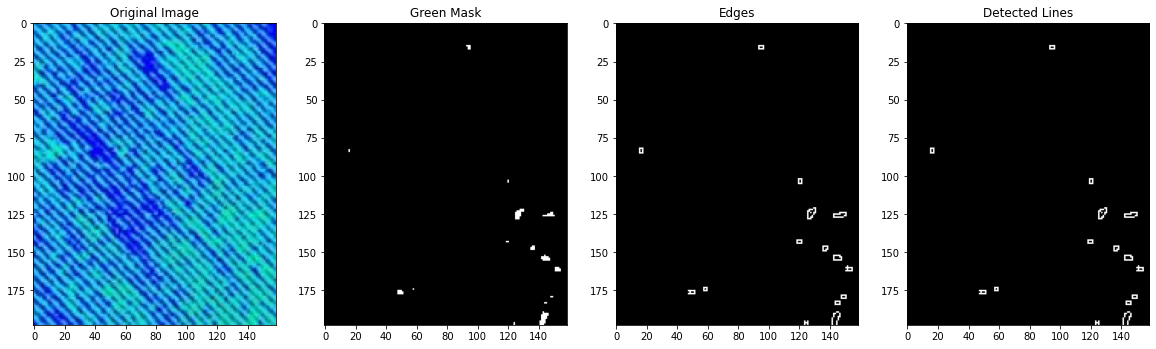

In [63]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_green_crop_rows(image_path):
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to open image file {image_path}")
        return

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_green = np.array([36, 25, 25])
    upper_green = np.array([86, 255, 255])

    mask = cv2.inRange(hsv, lower_green, upper_green)

    green_isolated = cv2.bitwise_and(image, image, mask=mask)

    gray = cv2.cvtColor(green_isolated, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    edges = cv2.Canny(blurred, 50, 150)

    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=30, minLineLength=20, maxLineGap=10)

    output_image = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 4, 2)
    plt.title("Green Mask")
    plt.imshow(mask, cmap='gray')

    plt.subplot(1, 4, 3)
    plt.title("Edges")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 4, 4)
    plt.title("Detected Lines")
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

    plt.show()

image_path = 'D:/Aksara/Weed Detection/Dataset/Capture.jpg'  # Replace with your image file path
detect_green_crop_rows(image_path)


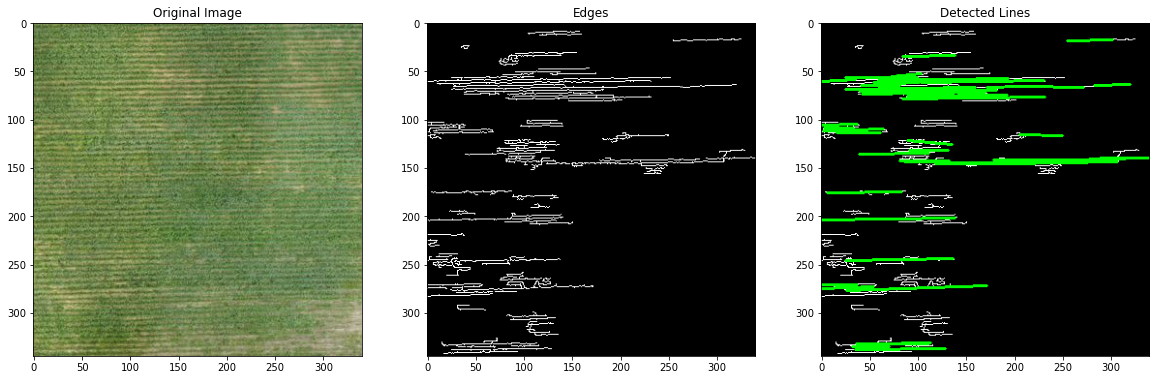

In [85]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_lines(image_path):
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to open image file {image_path}")
        return

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    edges = cv2.Canny(blurred, 50, 150)

    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=30, maxLineGap=10)

    output_image = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title("Edges")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Detected Lines")
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

    plt.show()

image_path = 'D:/Aksara/Weed Detection/Dataset/ss2.jpg'  # Replace with your image file path
detect_lines(image_path)


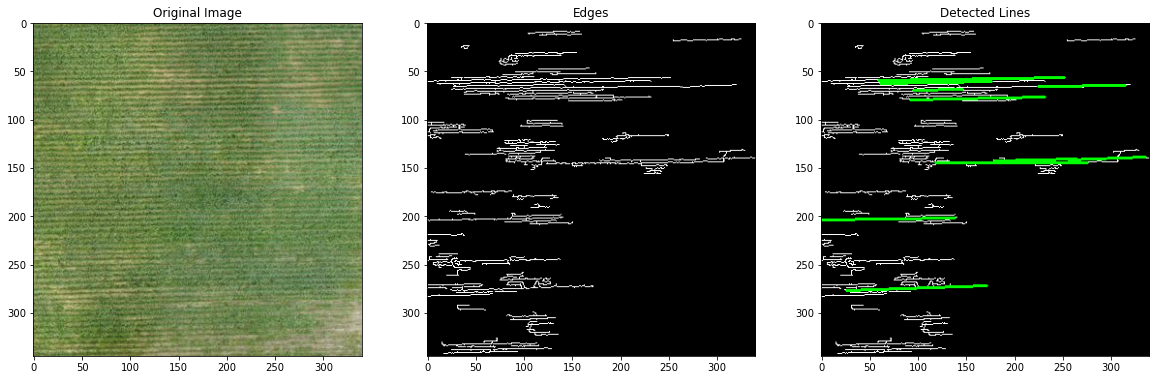

In [84]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_lines(image_path):
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error: Unable to open image file {image_path}")
        return

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    edges = cv2.Canny(blurred, 50, 150, )

    kernel = np.ones((1, 1), np.uint8)
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

    output_image = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title("Edges")
    plt.imshow(edges, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Detected Lines")
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

    plt.show()

image_path = 'D:/Aksara/Weed Detection/Dataset/ss2.jpg'  # Replace with your image file path
detect_lines(image_path)


# Canny without Gaussian

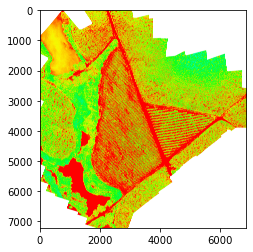

In [142]:
img = cv2.imread("D:/Aksara/Weed Detection/Dataset/Vari (1)-1,Vari (1)-2,Vari (1)-3\Vari (1)-1.jpg")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


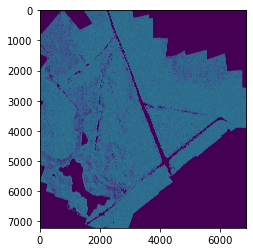

In [143]:
# separating blue, green, red channels
b,g,r = cv2.split(img)

# now minusing the red and green, as we only need green color
# you can vary multiplying integer 3 with 2, I got better results(sharp edges) when I used 3. But don't vary this too much 

gscale = 2*g-b-r

# # Convert the image to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply Gaussian blur to reduce noise and improve edge detection
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Canny is used for edge detection, you can vary min and max arguments, and its hard to find
gscale = cv2.Canny(gscale,280,290, apertureSize = 3)

cv2.imwrite('D:/Aksara/Weed Detection/Dataset/gscale.png', gscale)


# image will be shown in gray scale
plt.imshow(gscale)

In [139]:
# getting size of grayscaled image
size = np.size(gscale)

# creating array of zeros 
skel = np.zeros(gscale.shape, np.uint8)

# setting threshold's min & max value
ret, gscale = cv2.threshold(gscale,128,255,0)


element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

done = False
while (not done):
    # erosion removes the foreground object's boundary
    eroded = cv2.erode(gscale,element)
    
    # dilation is opposite of errosion
    temp = cv2.dilate(eroded, element)
    
    # subtract just removes the first images's pixels w.r.t to scecond
    temp = cv2.subtract(gscale, temp)
    
    # bitwise turns the pixel off if its value it 0, and turn it on if its >0
    skel = cv2.bitwise_or(skel, temp)
    
    gscale = eroded.copy()
    
    zeros = size - cv2.countNonZero(gscale)
    if zeros==size:
        done = True

In [135]:
size

49463104

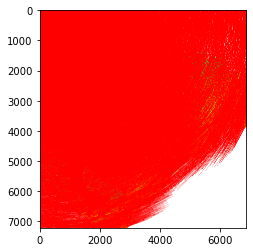

In [140]:
# Hough lines algorithm, it'll track the rows
lines = cv2.HoughLines(skel,3,np.pi/180,150)
a,b,c = lines.shape
for i in range(a):
    rho = lines[i][0][0]
    theta = lines[i][0][1]    
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),3, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [141]:
cv2.imwrite('D:/Aksara/Weed Detection/Dataset/result_canny.png', img)

True

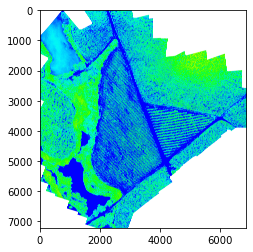

In [165]:
img = cv2.imread("D:/Aksara/Weed Detection/Dataset/Vari (1)-1,Vari (1)-2,Vari (1)-3\Vari (1)-1.jpg")
# img = cv2.imread("D:/Aksara/Weed Detection/Dataset/Capture.JPG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

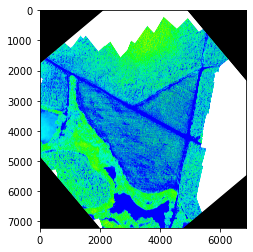

In [166]:
rows,cols,channels= img.shape 
M = cv2.getRotationMatrix2D((cols/2,rows/2),40,1) 

img_rotated = cv2.warpAffine(img,M,(cols,rows)) 
plt.imshow(img_rotated)

In [219]:
import cv2
import numpy as np


image = cv2.imread('D:/Aksara/Weed Detection/Dataset/snipping.jpg')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=7)

line_image = np.copy(image)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 0), 2)
        
# cv2.imwrite('D:/Aksara/Weed Detection/Dataset/gray_color_vari.png', output_image)


f = plt.figure(figsize=(20, 10), dpi=1200)

# plt.figure(dpi=1200)

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Edges")
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Detected Lines")
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

plt.show()

f.savefig("plot.pdf")


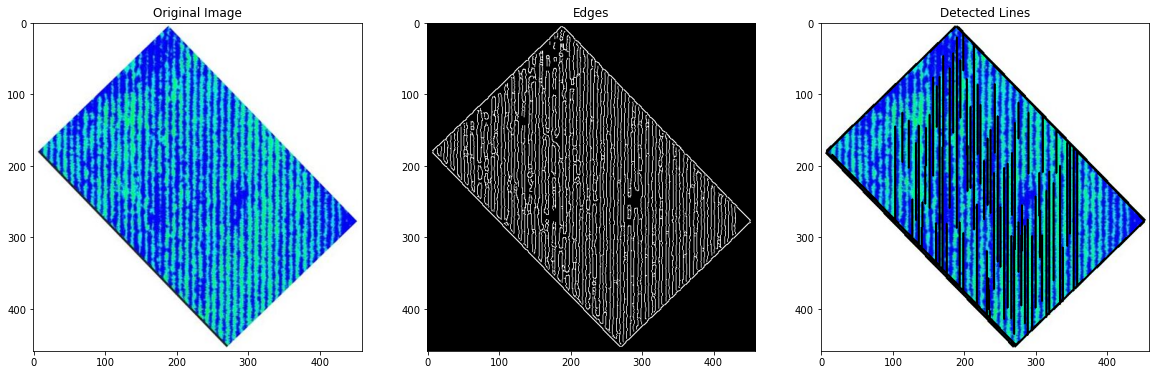

In [235]:
import cv2
import numpy as np


image = cv2.imread('D:/Aksara/Weed Detection/Dataset/snipping.jpg')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower_green = np.array([36, 43, 46])
# upper_green = np.array([70, 255, 255])
# mask = cv2.inRange(hsv, lower_green, upper_green)

blurred = cv2.GaussianBlur(gray, (7, 7), 0)

edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=110, minLineLength=50, maxLineGap=10)

line_image = np.copy(image)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 0), 2)
        
cv2.imwrite('D:/Aksara/Weed Detection/Dataset/output/edges_result_snip.png', edges)


plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Edges")
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Detected Lines")
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

plt.show()


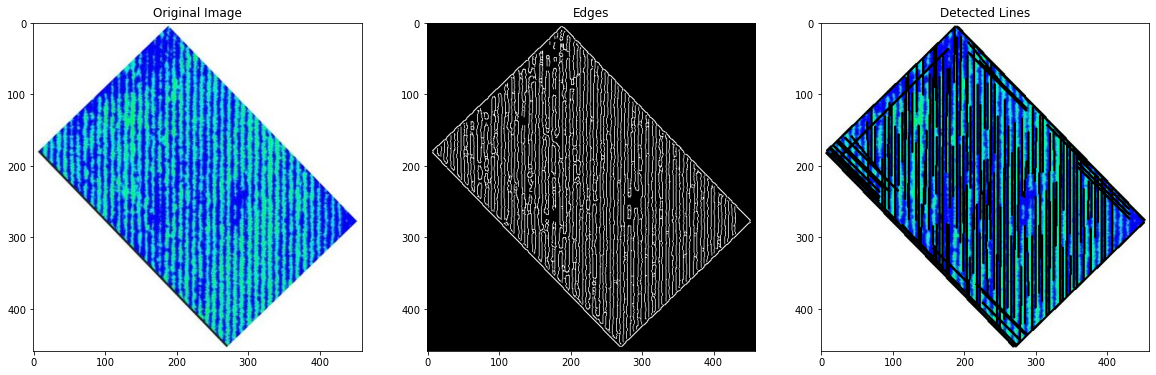

In [229]:
import cv2
import numpy as np


image = cv2.imread('D:/Aksara/Weed Detection/Dataset/snipping.jpg')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower_green = np.array([36, 43, 46])
# upper_green = np.array([70, 255, 255])
# mask = cv2.inRange(hsv, lower_green, upper_green)

blurred = cv2.GaussianBlur(gray, (7, 7), 0)

edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

line_image = np.copy(image)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 0), 2)
        
# cv2.imwrite('D:/Aksara/Weed Detection/Dataset/output/edges_result.png', edges)


plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Edges")
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Detected Lines")
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

plt.show()


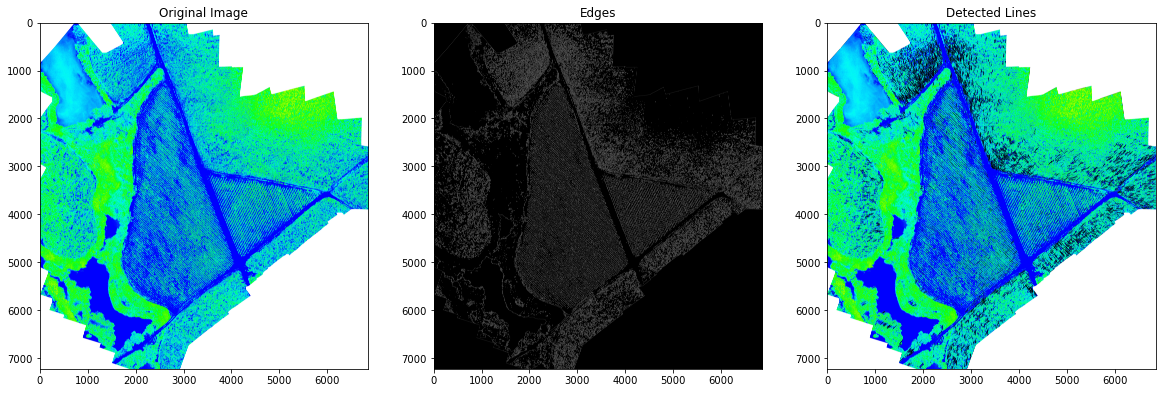

In [213]:
import cv2
import numpy as np


image = cv2.imread('D:/Aksara/Weed Detection/Dataset/Vari (1)-1,Vari (1)-2,Vari (1)-3\Vari (1)-1.jpg')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower_green = np.array([36, 43, 46])
# upper_green = np.array([70, 255, 255])
# mask = cv2.inRange(hsv, lower_green, upper_green)

blurred = cv2.GaussianBlur(gray, (7, 7), 0)

edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=110, minLineLength=50, maxLineGap=10)

line_image = np.copy(image)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 0), 2)
        
cv2.imwrite('D:/Aksara/Weed Detection/Dataset/output/line_result.png', line_image)


plt.figure(figsize=(20, 10), dpi=1200)

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Edges")
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Detected Lines")
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

plt.show()
